# 원-핫 인코딩

In [ ]:
! git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab_light_220429.sh
     

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 115, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 115 (delta 11), reused 10 (delta 3), pack-reused 91
Receiving objects: 100% (115/115), 1.27 MiB | 16.26 MiB/s, done.
Resolving deltas: 100% (50/50), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 45.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 KB 17.9 MB/s eta 0:00:00
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2023-04-08 12:27:05--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 18.205.93.0, 18.205.93.2, 18.205.93.1, ...
Connecting to 

In [ ]:
from konlpy.tag import Mecab
mecab = Mecab()
token = mecab.morphs("나는 자연어 처리를 배운다")  
print(token)

['나', '는', '자연어', '처리', '를', '배운다']


In [ ]:
word2index = {}
for voca in token:
     if voca not in word2index.keys():
       word2index[voca] = len(word2index)
print(word2index)

{'나': 0, '는': 1, '자연어': 2, '처리': 3, '를': 4, '배운다': 5}


In [ ]:
def one_hot_encoding(word, word2index):
       one_hot_vector = [0]*(len(word2index))
       index = word2index[word]
       one_hot_vector[index] = 1
       return one_hot_vector

In [ ]:
one_hot_encoding("자연어",word2index)


[0, 0, 1, 0, 0, 0]

# 워드 임베딩

희소표현

In [ ]:
import torch


In [ ]:
# 원-핫 벡터 생성
dog = torch.FloatTensor([1, 0, 0, 0, 0])
cat = torch.FloatTensor([0, 1, 0, 0, 0])
computer = torch.FloatTensor([0, 0, 1, 0, 0])
netbook = torch.FloatTensor([0, 0, 0, 1, 0])
book = torch.FloatTensor([0, 0, 0, 0, 1])

In [ ]:
print(torch.cosine_similarity(dog, cat, dim=0))
print(torch.cosine_similarity(cat, computer, dim=0))
print(torch.cosine_similarity(computer, netbook, dim=0))
print(torch.cosine_similarity(netbook, book, dim=0)) # 차원 자체도 너무 커지고, 단어의 유사도도 반영할 수 없음

tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)


밀집 표현
-----------

총 차원(단어의 개수)이 10000개 여도 사용자가 지정한 밀집표현의 차원(ex. 128)으로 표현


워드 임베딩

-----------------
단어를 밀집 벡터로 표현하는 방법 = 임베딩


임베딩 벡터

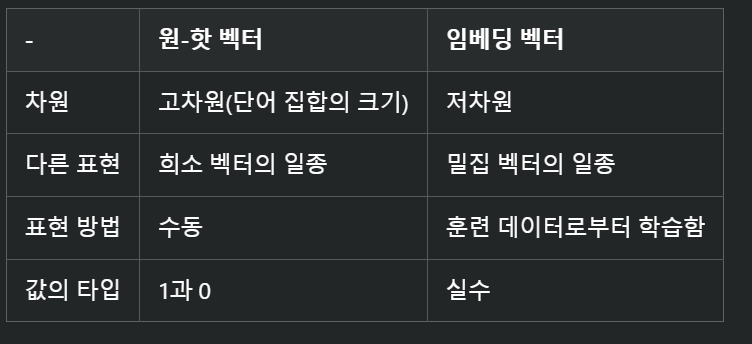

# nn.Embedding()

nn.Embedding() 없이 룩업 테이블 과정 이해하기

In [ ]:
import torch

In [ ]:
train_data = 'you need to know how to code'

# 중복을 제거한 단어들의 집합인 단어 집합 생성.
word_set = set(train_data.split())

# 단어 집합의 각 단어에 고유한 정수 맵핑.
vocab = {word: i+2 for i, word in enumerate(word_set)}
vocab['<unk>'] = 0
vocab['<pad>'] = 1
print(vocab)

{'you': 2, 'how': 3, 'need': 4, 'code': 5, 'to': 6, 'know': 7, '<unk>': 0, '<pad>': 1}


In [ ]:
# 단어 집합의 크기만큼의 행을 가지는 테이블 생성.
embedding_table = torch.FloatTensor([
                               [ 0.0,  0.0,  0.0],
                               [ 0.0,  0.0,  0.0],
                               [ 0.2,  0.9,  0.3],
                               [ 0.1,  0.5,  0.7],
                               [ 0.2,  0.1,  0.8],
                               [ 0.4,  0.1,  0.1],
                               [ 0.1,  0.8,  0.9],
                               [ 0.6,  0.1,  0.1]])

In [ ]:
sample = 'you need to run'.split()
idxes = []

# 각 단어를 정수로 변환
for word in sample:
  try:
    idxes.append(vocab[word])
  # 단어 집합에 없는 단어일 경우 <unk>로 대체된다.
  except KeyError:
    idxes.append(vocab['<unk>'])
idxes = torch.LongTensor(idxes)

# 각 정수를 인덱스로 임베딩 테이블에서 값을 가져온다.
lookup_result = embedding_table[idxes, :]
print(lookup_result)

tensor([[0.2000, 0.9000, 0.3000],
        [0.2000, 0.1000, 0.8000],
        [0.1000, 0.8000, 0.9000],
        [0.0000, 0.0000, 0.0000]])


In [ ]:
idxes

tensor([2, 4, 6, 0])

nn.Embedding() 사용하기

In [ ]:
train_data = 'you need to know how to code'

# 중복을 제거한 단어들의 집합인 단어 집합 생성.
word_set = set(train_data.split())

# 단어 집합의 각 단어에 고유한 정수 맵핑.
vocab = {tkn: i+2 for i, tkn in enumerate(word_set)}
vocab['<unk>'] = 0
vocab['<pad>'] = 1

In [ ]:
import torch.nn as nn
embedding_layer = nn.Embedding(num_embeddings=len(vocab), 
                               embedding_dim=3,
                               padding_idx=1)

In [ ]:
print(embedding_layer.weight)

Parameter containing:
tensor([[-0.3364, -1.3076,  1.9742],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.9955, -0.3971, -0.2139],
        [ 1.4239,  1.0910,  0.2383],
        [ 0.9346,  0.9464,  0.5317],
        [ 1.5603,  1.2632,  0.1126],
        [-0.5010,  0.0327,  0.0223],
        [ 0.5508, -0.0376, -0.2447]], requires_grad=True)


# 사전학습 임베딩 사용 (torchtext)

In [ ]:
!pip uninstall torchtext

In [1]:
torchtext.__version__

NameError: ignored

In [2]:
!pip install torchtext==0.10.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 82.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 831.4/831.4 MB 2.1 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.0.0+cu118
    Uninstalling torch-2.0.0+cu118:
      Successfully uninstalled torch-2.0.0+cu118
  Attempting uninstall: torchtext
    Found existing installation: torchtext 0.15.1
    Uninstalling torchtext-0.15.1:
      Successfully uninstalled torchtext-0.15.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.15.1+cu118 requires torch==2.0.0, but you have torch 1.9.1 which is incompatible.
torchdata 0.6.0 requires torch==2.0.0, but you have torch 1.9.1 which is incompatible.
torchaudio 2.0.1+cu118 requires torch==2.0.0, but 

In [3]:
from torchtext.legacy import data, datasets

In [4]:
TEXT = data.Field(sequential=True, batch_first=True, lower=True)
LABEL = data.Field(sequential=False, batch_first=True)

In [5]:
trainset, testset = datasets.IMDB.splits(TEXT, LABEL)

downloading aclImdb_v1.tar.gz


aclImdb_v1.tar.gz: 100%|██████████| 84.1M/84.1M [00:09<00:00, 9.28MB/s]


In [6]:
print('훈련 데이터의 크기 : {}' .format(len(trainset)))

훈련 데이터의 크기 : 25000


In [7]:
print(vars(trainset[0]))

{'text': ['the', 'next-to-last', 'episode', 'aired', 'of', 'the', 'original', 'star', 'trek', 'series', 'is', 'an', 'interesting,', 'sometimes', 'melancholy', 'installment', 'that', 'proves', 'the', 'show', 'was', 'still', 'exploring', 'its', 'characters', 'even', 'at', 'this', 'point', 'in', 'the', 'third', 'season;', 'though', 'flawed,', "'all", 'our', "yesterdays'", 'has', 'its', 'moments', 'and', 'overall', 'a', 'moody,', 'compelling', 'feel', 'to', 'it.', 'kirk,', 'spock,', 'and', 'mccoy', 'beam', 'down', 'to', 'a', 'planet,', 'assuming', 'they', 'are', 'arriving', 'in', 'the', 'nick', 'of', 'time', 'to', 'save', 'or', 'at', 'least', 'give', 'some', 'warning', 'to', 'whatever', 'populace', 'is', 'there,', 'since', 'the', "planet's", 'sun', 'is', 'due', 'to', 'explode', 'within', 'hours.', 'but', 'as', 'it', 'turns', 'out,', 'the', 'people', 'there', 'are', 'all', 'too', 'aware', 'of', 'the', "planet's", 'fate,', 'and', 'using', 'a', 'kind', 'of', 'time', 'travel', 'device,', 'have

In [10]:
from torchtext.vocab import GloVe

In [11]:
TEXT.build_vocab(trainset, vectors=GloVe(name='6B', dim=300), max_size=10000, min_freq=10)
LABEL.build_vocab(trainset)

.vector_cache/glove.6B.zip: 862MB [02:40, 5.36MB/s]                           
100%|█████████▉| 399999/400000 [00:33<00:00, 11870.60it/s]


In [12]:
print('임베딩 벡터의 개수와 차원 : {} '.format(TEXT.vocab.vectors.shape))

임베딩 벡터의 개수와 차원 : torch.Size([10002, 300]) 


In [13]:
print(TEXT.vocab.vectors[0]) # <unk>의 임베딩 벡터값

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [16]:
import torch
import torch.nn as nn

embedding_layer = nn.Embedding.from_pretrained(TEXT.vocab.vectors, freeze=False)
embedding_layer(torch.LongTensor([10])) # 단어 this의 임베딩 벡터값

tensor([[-2.0437e-01,  1.6431e-01,  4.1794e-02, -1.3708e-01, -2.9779e-01,
          3.3440e-01, -6.9955e-02, -6.8036e-02,  1.0604e-01, -2.0337e+00,
          1.7977e-01, -7.7403e-02, -1.9518e-01,  1.8324e-01,  3.0017e-02,
         -5.4762e-02, -4.5725e-01, -2.4509e-02,  5.7387e-02, -3.4878e-01,
          3.9696e-02,  4.4826e-01, -5.8462e-02,  4.1181e-01, -3.5411e-02,
         -1.4722e-01,  1.0740e-01, -2.5896e-01, -1.1658e-01,  1.9822e-01,
          3.2850e-01,  2.4177e-01, -5.7177e-01, -5.6442e-02, -9.6437e-01,
          3.4482e-01,  5.4639e-02,  2.3828e-01, -1.9139e-01,  3.0899e-01,
          2.8044e-01, -3.3814e-02, -2.5436e-01,  1.5373e-02,  1.6341e-01,
          2.6352e-01,  1.5812e-01,  3.2044e-01, -2.3082e-01,  2.6050e-01,
          2.0606e-01, -8.9769e-02, -1.0055e-01,  7.0378e-02, -2.7452e-02,
          2.7959e-01, -9.5862e-02,  2.0574e-01,  2.9522e-01, -1.2285e-02,
          1.1164e-01, -5.1373e-02,  4.6106e-01,  2.3014e-02, -3.7141e-01,
         -2.4166e-01,  3.3773e-02,  3.